# Analysis of the Black Swan strategy

Findings:
- It works, but it does not work better than just investing in stocks.
- It is quite sensitive to the hyper-parameters horizon and out-of-money chosen, which is a sign that the case where it works really really well is a case of striking a gold mine.

Suggestion: Don't do it.
(Also b/c it will mean that you will have to hold all your capital in cash, as the Black Swan counteracts a stock-investment strategy. So the Black Swan will be the only one you can try to run. There is on diversification.)

In [1]:
# We want to reload all modules before execution, each time, as we do not care about performance
# but easy development and we will be changing the modules a ton:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.append(os.environ.get('BLACK_SWAN_PATH'))
from tqdm.notebook import tqdm

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from strategy_simulation import Simulation, SimulationOptions

In [3]:
sim = Simulation()

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



# Dry-run of the simulation

In [4]:
#sim.run(defined_subset=['AKAM_prices'])
#sim.run(defined_subset=['AKAM_prices', 'MSI_prices'])
sim.run()

100%|██████████| 218/218 [02:02<00:00,  1.78it/s]

Finished calculating the yearly sigmas.


,CMI_prices,VNO_prices,TMO_prices,CMCSA_prices,AMD_prices,NEM_prices,TPR_prices,BF-B_prices,BR_prices,BLK_prices,...,CAG_prices,WFC_prices,CRM_prices,CPB_prices,WY_prices,VZ_prices,XRX_prices,WST_prices,VRSN_prices,NVDA_prices
Date,,,,,,,,,,,,,,,,,,,,,
1979-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


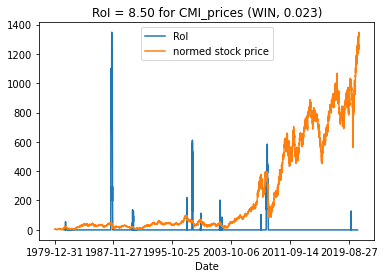

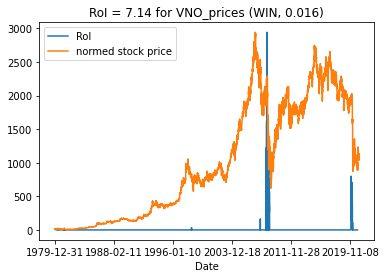

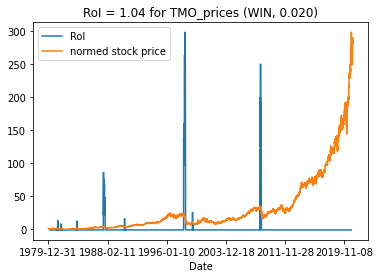

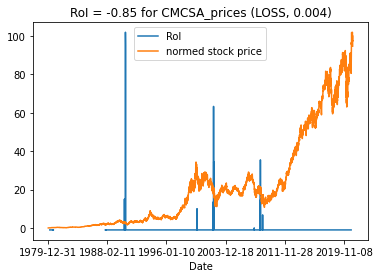

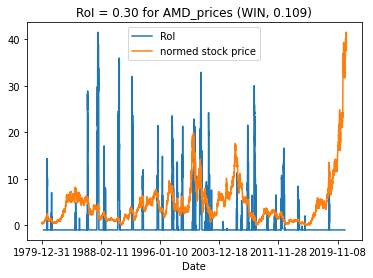

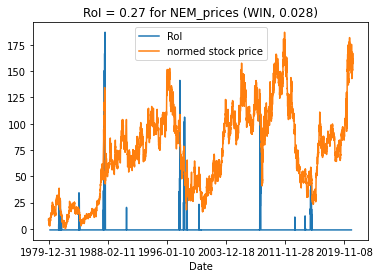

In [5]:
PLOT_LIMIT = 5

for k, stock in enumerate(sim.payouts):
    payouts = sim.payouts[~sim.sigmas[stock].isna()][stock]
    normed_stock_prices = sim.prices[~sim.sigmas[stock].isna()][stock]
    normed_stock_prices -= normed_stock_prices.min()
    normed_stock_prices /= normed_stock_prices.max()
    normed_stock_prices *= payouts.max()
    tag = 'WIN' if payouts.mean() > 0 else 'LOSS'
    percentage_of_positive_days = (payouts > 0.0).sum() / len(payouts)
    
    if k <= PLOT_LIMIT:
        fig = plt.subplots()
        payouts.plot()
        normed_stock_prices.plot()
        plt.title(f'RoI = {payouts.mean():.2f} for {stock} ({tag}, {percentage_of_positive_days:.3f})')
        plt.legend(['RoI', 'normed stock price'])

In [6]:
# RoI (in 1) per stock:
sim.payouts.mean()

CMI_prices       8.499547
VNO_prices       7.136802
TMO_prices       1.041069
CMCSA_prices    -0.853640
AMD_prices       0.295142
                  ...    
VZ_prices       -0.747312
XRX_prices      11.770159
WST_prices      -0.767157
VRSN_prices     -0.805542
NVDA_prices     -0.624372
Length: 218, dtype: float64

In [7]:
# Variation of RoI (in 1) = risk of picking only one stock:
sim.payouts.mean().std()

18.954472769364173

In [8]:
# Total RoI (in 1) over all stocks:
sim.payouts.mean().mean()

4.961882501232193

In [9]:
# Share of worthwhile days / share of loss days:
print('Share of winning days in %:')
for stock in sim.payouts:
    payouts = sim.payouts[~sim.sigmas[stock].isna()][stock]
    percentage_of_positive_days = (payouts > 0.0).sum() / len(payouts)
    print(f'{stock}: {percentage_of_positive_days * 100:.1f}')

Share of winning days in %:
CMI_prices: 2.3
VNO_prices: 1.6
TMO_prices: 2.0
CMCSA_prices: 0.4
AMD_prices: 10.9
NEM_prices: 2.8
TPR_prices: 3.6
BF-B_prices: 0.0
BR_prices: 1.5
BLK_prices: 1.1
DUK_prices: 0.0
ZBRA_prices: 2.0
D_prices: 0.0
TSN_prices: 3.3
TJX_prices: 1.5
bp: 0.0
LKQ_prices: 1.8
CERN_prices: 4.4
CINF_prices: 0.5
AEE_prices: 0.0
DXCM_prices: 5.8
WDC_prices: 8.8
WMT_prices: 0.3
CMS_prices: 2.2
AOS_prices: 1.9
WELL_prices: 0.6
BEN_prices: 1.5
AVGO_prices: 0.3
CFG_prices: 3.3
CBOE_prices: 0.2
BAX_prices: 0.7
AAP_prices: 1.2
CMG_prices: 3.3
TFX_prices: 0.8
NI_prices: 0.0
VRTX_prices: 5.2
TSCO_prices: 1.6
CHD_prices: 0.4
AEP_prices: 0.0
BIIB_prices: 4.7
LH_prices: 3.2
XRAY_prices: 0.9
ADP_prices: 0.2
BBY_prices: 7.4
NEE_prices: 0.0
AMAT_prices: 4.6
CPRT_prices: 2.8
WBA_prices: 0.3
BXP_prices: 2.3
AMZN_prices: 3.6
ABMD_prices: 5.3
WM_prices: 1.2
ABT_prices: 0.2
NKE_prices: 0.7
db: 0.0
NOW_prices: 1.2
CF_prices: 4.3
DRE_prices: 1.8
AAPL_prices: 5.2
NWSA_prices: 0.0
ALL_prices: 1.

In [10]:
# Share of winning stocks:
print(f'{100 * (sim.payouts.mean() > 0).sum() / len(sim.payouts.columns):.1f} % of stocks were winners.')

48.2 % of stocks were winners.


In [11]:
# What ratio of stocks has a median pay-out that is higher than a total loss?
print(f'{100 * (sim.payouts.median() > -1.0).sum() / len(sim.payouts.columns):.1f} % of stocks had less than 50% total loss days.')

0.0 % of stocks had less than 50% total loss days.


/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:995: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


# Time-wise locality of winnings

In [12]:
# How tightly clustered are the winnings, i.e. are all winnings coming from only one lucky spell, 
# or are opportunities equally distributed? (If they are too tightly clustered, it means that we would
# have to spread our assets on more stocks and it would be more likely to get rich or die trying).

In [13]:
# Cluster the win-chance by averaging month-wise and year-wise.

# Hyperparameter search
Test the expected results for various out-of-money factors and horizons.

In [14]:
# Define a scoring function over the payouts:
def hyper_score(sim):
    return sim.payouts.mean().mean()

In [16]:
# Parameters:
hyper_oom = np.linspace(0.3, 1.3, 11)
hyper_horizon = np.linspace(63, 252, 5, dtype=int)

In [17]:
results = {
    'horizon': [],
    'out_of_money': [],
    'score': [],
}

# Run the hyperparameter search:
for out_of_money in hyper_oom:
    for horizon in hyper_horizon:
        hyper_sim = Simulation(
            options=SimulationOptions(
                out_of_money_factor=out_of_money,
                horizon=horizon,
            )
        )
        
        hyper_sim.run()
        
        results['horizon'].append(horizon)
        results['out_of_money'].append(out_of_money)
        results['score'].append(hyper_score(hyper_sim))       

  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:59<00:00,  1.83it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [02:08<00:00,  1.69it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:47<00:00,  2.03it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:46<00:00,  2.05it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:48<00:00,  2.00it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:42<00:00,  2.12it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:50<00:00,  1.97it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:43<00:00,  2.11it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:40<00:00,  2.16it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:45<00:00,  2.07it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:51<00:00,  1.96it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:51<00:00,  1.96it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:48<00:00,  2.01it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [02:20<00:00,  1.55it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [02:45<00:00,  1.32it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:40<00:00,  2.17it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:48<00:00,  2.01it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:36<00:00,  2.25it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:36<00:00,  2.26it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:37<00:00,  2.24it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:37<00:00,  2.25it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:37<00:00,  2.23it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:36<00:00,  2.26it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:36<00:00,  2.25it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:36<00:00,  2.25it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:37<00:00,  2.24it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:36<00:00,  2.25it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:37<00:00,  2.25it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:36<00:00,  2.26it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:37<00:00,  2.24it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:36<00:00,  2.26it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:36<00:00,  2.25it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:36<00:00,  2.25it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:36<00:00,  2.26it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:36<00:00,  2.25it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:37<00:00,  2.23it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:37<00:00,  2.24it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:37<00:00,  2.23it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:37<00:00,  2.24it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:38<00:00,  2.22it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:37<00:00,  2.24it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:36<00:00,  2.25it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:37<00:00,  2.25it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:37<00:00,  2.25it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:36<00:00,  2.25it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:37<00:00,  2.23it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:37<00:00,  2.24it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:36<00:00,  2.25it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:37<00:00,  2.24it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:36<00:00,  2.25it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:36<00:00,  2.26it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:36<00:00,  2.26it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:37<00:00,  2.24it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:37<00:00,  2.25it/s]

Finished calculating the yearly sigmas.


  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:37<00:00,  2.24it/s]

Finished calculating the yearly sigmas.


In [18]:
results = pd.DataFrame(results)

In [34]:
results

,horizon,out_of_money,score
0,63,0.3,-0.671607
1,110,0.3,-0.808112
2,157,0.3,-0.383235
3,204,0.3,0.599393
4,252,0.3,1.644727
5,63,0.4,-0.376899
6,110,0.4,9.179705
7,157,0.4,5.690362
8,204,0.4,51.353329
9,252,0.4,16.361951


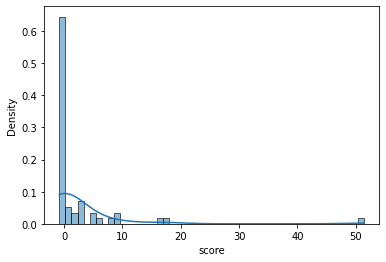

In [19]:
sns.histplot(results.score, kde=True, stat='density')

In [20]:
# One final run with the best parameters to fuel the following comparison:
best_index = results.score.idxmax()
sim = Simulation(
    options=SimulationOptions(
        horizon=results.horizon.iloc[best_index],
        out_of_money_factor=results.out_of_money.iloc[best_index],
    )
)
sim.run()

  0%|          | 0/218 [00:00<?, ?it/s]

Loaded 220 stocks from /home/notger-heinz/projects_and_analysis/black_swan_strategy/prices.
2 stocks were rejected for reason of having less than 1000 entries.
After filtering out 4192 rows with weird date formats, 10552 rows remain.
After removal of discontinuous stock price lists was skipped, 218 stocks are left.



100%|██████████| 218/218 [01:37<00:00,  2.24it/s]

Finished calculating the yearly sigmas.


,CMI_prices,VNO_prices,TMO_prices,CMCSA_prices,AMD_prices,NEM_prices,TPR_prices,BF-B_prices,BR_prices,BLK_prices,...,CAG_prices,WFC_prices,CRM_prices,CPB_prices,WY_prices,VZ_prices,XRX_prices,WST_prices,VRSN_prices,NVDA_prices
Date,,,,,,,,,,,,,,,,,,,,,
1979-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Strategy comparison
Compare strategies where we randomly bet on one stock per month/year and see what the return would be.

For the time-wise allocation of our bets, we don't want to make our lives difficult by going e.g. for the end-of-the-month and having to find that end of the month. This is non-trivial, as after 1999, the trading days have changed from 252/253 per year to 260/262 per year.

Instead, we assume a norm-year with 252 trading days and will split up our investments accordingly, investing every N days, where N = 252/12 = monthly investment and N = 252 = yearly investment.

In [21]:
# Number of simulation runs to create a distribution:
N = 1_000

## Base-line strategy
We pick on stock and hold it until the end of times. What would out pay-off have been?

In [22]:
def save_and_return_complete_timeline(data, filename):
    """
    Appends simulated data, if that has not already been saved.
    """
    try:
        tmp = pd.read_csv(filename, squeeze=True)

        # Check if the data is already in:
        if np.isclose(tmp.values[-1], data.values[-1], 1e-5):
            print(f'Data already saved in file, so we are not re-saving it.')
            return tmp
        else:
            print('Data appended to stored data.')
            tmp = tmp.append(data).reset_index().drop('index', axis=1).squeeze()
            tmp.to_csv(filename, index=False)
            return tmp

    except:
        print(f'{filename} not found, generating new file from data.')
        data.to_csv(filename, index=False)
        return data

**ATTENTION** The Black Swan Strategy might have a lower count number of operable days, since we restricted trading to not start right away. We have to check this and adjust the starting offset for the baseline strategy to be completely fair.

In [23]:
# Find the minimum to start from, see above, by checking for the first row with payouts from the Black Swan strategy:
for base_line_offset in range(0, len(sim.payouts)):
    if len(sim.payouts.iloc[base_line_offset].dropna()) > 0:
        break

In [24]:
def base_line_strategy_return(sim, investment_offset=50, investment_period=int(252/12)):
    """
    Takes the sim with the prices loaded and an index k and returns the roi, where 0 means neither win nor loss.
    :param investment_offset: First index to start investing.
    :param investment_period: How many trading days until next investment?
    """   
    def has_prices(sim, k):
        # Check if there are any prices to invest in at all:
        return len(sim.prices.iloc[k].dropna() > 0)

    def pick_stock(sim, k):
        # Pick one candidate, buy it and stick with it to its last trading day / day on record:
        investment_candidate = sim.prices.iloc[k].dropna().sample(1).index
        price = sim.prices[investment_candidate].iloc[k]
        final_price = sim.prices[investment_candidate].dropna().iloc[-1]
        return (final_price - price) / (price)
    
    rois = [
        pick_stock(sim, k) 
        for k in range(investment_offset, len(sim.prices), investment_period) 
        if has_prices(sim, k)
    ]
    
    return np.mean(rois)

In [25]:
base_line_strat = []
for k in tqdm(range(N)):
    base_line_strat.append(base_line_strategy_return(sim=sim, investment_offset=base_line_offset))
    
base_line_strat = pd.Series(base_line_strat)

In [26]:
base_line_strat = save_and_return_complete_timeline(base_line_strat, 'base_line_strat.csv')

base_line_strat.csv not found, generating new file from data.


## Cash-out Black Swan

In [27]:
def cash_out_black_swan_return(sim, investment_offset=0, investment_period=int(252/12)):
    """
    Calculates the ROIs for a Black Swan strategy where we cash out at the end of the investment horizon.
    This means we will always invest the same amount of money, wait for a year and then reap the benefits.
    No reinvestment.
    """
    def has_prices(sim, k):
        # Check if there are any prices to invest in at all:
        return len(sim.payouts.iloc[k].dropna() > 0)
    
    def pick_stock(sim, k):
        return sim.payouts.iloc[k].dropna().sample(1)
     
    rois = [
        pick_stock(sim, k) 
        for k in range(investment_offset, len(sim.prices), investment_period) 
        if has_prices(sim, k)
    ]
    
    return np.mean(rois)

In [28]:
cash_out_swan = []
for k in tqdm(range(N)):
    cash_out_swan.append(cash_out_black_swan_return(sim=sim))
    
cash_out_swan = pd.Series(cash_out_swan)

In [29]:
cash_out_swan = save_and_return_complete_timeline(cash_out_swan, 'cash_out_swan.csv')

cash_out_swan.csv not found, generating new file from data.


## Reinvest Black Swan

In [30]:
def reinvest_black_swan_return(sim, investment_offset=0, investment_period=int(252/12)):
    """
    Calculates the ROIs for a Black Swan strategy where we reinvest in a given month,
    what we got as payout in the month before plus the additional bunch that we had planned for anyway.
    
    We get this by walking the path from beginning to end for each month and multiplying all returns.
    """
    def has_prices(sim, k):
        # Check if there are any prices to invest in at all:
        return len(sim.payouts.iloc[k].dropna() > 0)
    
    def pick_stock(sim, k):
        # Choose a stock:
        stock = sim.payouts.iloc[k].dropna().sample(1).index
        
        # Get the cumulative product for all returns which are spaced apart according 
        # to the investment horizon. Please note that as returns are neutral at zero,
        # we have to add 1 to determine the actual payout when the option matures.
        # Also, the cumulative product returns the running product, so we have to take
        # the last value, as that is when we decide to finally cash out and not reinvest.
        return (1 + sim.payouts[stock].iloc[k::sim.options.horizon].dropna()).cumprod().iloc[-1]
     
    rois = [
        pick_stock(sim, k) 
        for k in range(investment_offset, len(sim.prices), investment_period) 
        if has_prices(sim, k)
    ]
    
    return np.mean(rois)

In [31]:
reinvest_black_swan = []
for k in tqdm(range(N)):
    reinvest_black_swan.append(reinvest_black_swan_return(sim=sim))
    
reinvest_black_swan = pd.Series(reinvest_black_swan)

In [32]:
reinvest_black_swan = save_and_return_complete_timeline(reinvest_black_swan, 'reinvest_swan.csv')

reinvest_swan.csv not found, generating new file from data.


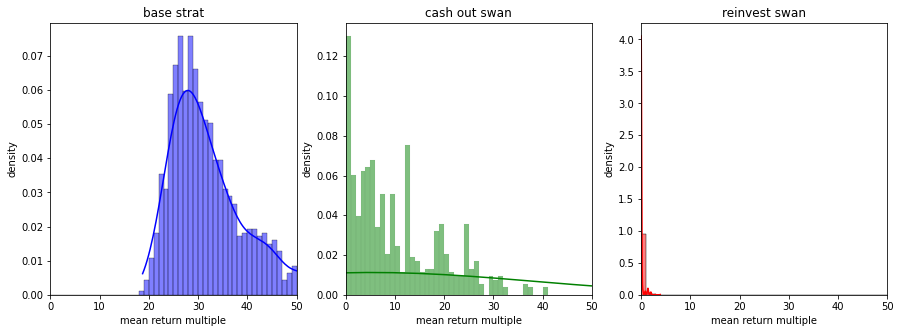

In [36]:
bins = np.linspace(0, 50, 51)
colors = ['b', 'g', 'r']
collections = [base_line_strat, cash_out_swan, reinvest_black_swan]
plot_titles = ['base strat', 'cash out swan', 'reinvest swan']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for k, ax in enumerate(axes):
    sns.histplot(collections[k], ax=ax, stat='density', kde=True, bins=bins, color=colors[k])
    ax.set_title(plot_titles[k])
    ax.set_xlabel('mean return multiple')
    ax.set_ylabel('density')
    ax.set_xlim(min(bins), max(bins))